This notebook examines the basic stats and shape of the data.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
#%matplotlib notebook


import re

from functools import partial

import plotly.graph_objects as go

Import the cleaned data:

In [2]:
%ls -lt ../../data/genre_lists/data_ready_for_model/

ls: ../../data/genre_lists/data_ready_for_model/: No such file or directory


In [3]:
%store -r now
now
#now = '2020-05-11-14-35'

'2020-07-07-09-58'

In [4]:
X_train = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_train_{}.csv'.format(now), index_col = ['artist'])
y_train = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_train_{}.csv'.format(now), index_col = ['artist'])

In [5]:
X_train.head()

,genrelist,genrelist_length
artist,,
Pablo_Holman,"['pop', 'rock', 'emo_pop']",3
Bobby_Edwards,['country'],1
La_Palabra,"['afro_cuban_jazz', 'son_montuno', 'guaracha',...",4
Sherrick,"['r_and_b', 'soul']",2
Allen_Collins,['southern_rock'],1


In [6]:
X_train.shape, y_train.shape

((12376, 2), (12376, 1))

In [7]:
data = y_train.join( [X_train], how = 'outer')

In [8]:
data.head()

,gender,genrelist,genrelist_length
artist,,,
Pablo_Holman,male,"['pop', 'rock', 'emo_pop']",3
Bobby_Edwards,male,['country'],1
La_Palabra,male,"['afro_cuban_jazz', 'son_montuno', 'guaracha',...",4
Sherrick,male,"['r_and_b', 'soul']",2
Allen_Collins,male,['southern_rock'],1


In [9]:
data.shape, data.isnull().sum()

((12376, 3),
 gender              0
 genrelist           0
 genrelist_length    0
 dtype: int64)

### Genre Labels

Each value of the genre column is a _string_ of comma separated genre labels. We want to convert it to a _list_ of strings.

In [10]:
"""This function takes in a string of the form
appearing in the genrelist of the dataframe.
It strips the square brackets and extra quotes and
returns a list of strings where each string is a genre label."""
def genrelist(string):
    string = string.strip("[").strip("]").replace("'","")
    L = [s for s in string.split(',')]
    L_new = []
    for x in L:
        L_new.append(x.replace(" ","_").lstrip("_").rstrip("_"))
    while (str("") in L_new):
        L_new.remove("")
    return L_new

Now we apply it to the whole column and put the lists in a new column:

In [11]:
data['genrelist']= data['genrelist'].apply(genrelist)

In [12]:
data.head()

,gender,genrelist,genrelist_length
artist,,,
Pablo_Holman,male,"[pop, rock, emo_pop]",3
Bobby_Edwards,male,[country],1
La_Palabra,male,"[afro_cuban_jazz, son_montuno, guaracha, salsa...",4
Sherrick,male,"[r_and_b, soul]",2
Allen_Collins,male,[southern_rock],1


### Extract unique genre labels: 

### This is for the training set:

In [13]:
# genre_list = data.genrelist.values.tolist()
# genre_list = [x for y in genre_list for x in y]
# genre_list = list(set(genre_list))

### Import the labels from the whole data set:

In [14]:
genrelist_df = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_list_{}.csv'.format(now), index_col = 'Unnamed: 0')

In [15]:
genrelist_df[:5]

,genre_list
0,1960s
1,2_step
2,2_step_garage
3,2_tone
4,a_cappella


In [16]:
genrelist_df.shape

(1491, 1)

In [17]:
print('There are {} artists with genre and binary-gender labels.'.format(data.shape[0]))
print('There are {} unique genre labels.'.format(genrelist_df.shape[0]))
print('Previously there were 1669 unique genre lables.')

There are 12376 artists with genre and binary-gender labels.
There are 1491 unique genre labels.
Previously there were 1669 unique genre lables.


### Export the list of genres:

In [18]:
# genre_list_df = pd.DataFrame({'genre_list':genre_list})

In [19]:
#  genre_list_df.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_list_training_{}.csv'.format(now))

In [20]:
%ls -lt ../../data/genre_lists/data_ready_for_model/

ls: ../../data/genre_lists/data_ready_for_model/: No such file or directory


In [21]:
data_male = data[data.gender == 'male']
data_female = data[data.gender == 'female']

In [22]:
tot = data.shape[0]
m = data_male.shape[0]
f = data_female.shape[0]
print('{} total artists'.format(tot))
print('{} female artists, or {:0.0f}%'.format(f, 100*f/(f+m)))
print('{} male artists, or {:0.0f}%'.format(m, 100*m/(f+m)))

12376 total artists
3847 female artists, or 31%
8529 male artists, or 69%


### Count the min, mean, max of number of genres:

In [23]:
n = data.shape[0]
a,b,c = data.genrelist_length.mean(), data.genrelist_length.std(), data.genrelist_length.max()
print('Total:')
print(f'{n} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Total:
12376 Artists.
Mean number of genre labels: 2.7.
STD of the number of genre labels: 1.83.
Max number of genre labels: 73.


### Count the min, mean, max of number of genres for male and female artists:

In [24]:
data_female = data[data.gender == 'female']
n = data_female.shape[0]
a,b,c = data_female.genrelist_length.mean(), data_female.genrelist_length.std(), data_female.genrelist_length.max()
print('Female:')
print(f'{n} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Female:
3847 Artists.
Mean number of genre labels: 2.63.
STD of the number of genre labels: 1.52.
Max number of genre labels: 11.


In [25]:
# plt.hist(data_female.num_genres, bins = 25, density = True)
# plt.show()

In [26]:
data_male = data[data.gender == 'male']
m = data_male.shape[0]
a,b,c = data_male.genrelist_length.mean(), data_male.genrelist_length.std(), data_male.genrelist_length.max()
print('Male:')
print(f'{m} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Male:
8529 Artists.
Mean number of genre labels: 2.74.
STD of the number of genre labels: 1.95.
Max number of genre labels: 73.


In [27]:
# plt.hist(data_male.num_genres, bins = 25, density = True)
# plt.show()

Set variables:

In [28]:
max_num_male = 73
max_num_female = 11
max_num = max(max_num_female, max_num_male)

### The histograms for genre labels for male and female artists. 

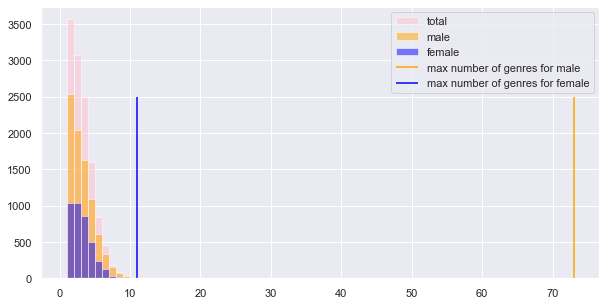

In [29]:
plt.figure(figsize = (10, 5))
plt.hist(data.genrelist_length, bins = range(1,max_num), density = False, color = 'pink', alpha = .5, label = 'total')
plt.hist(data_male.genrelist_length, bins = range(1,max_num), density = False, color = 'orange', alpha = .5, label = 'male')
plt.vlines(x = max_num_male, ymin = 0 , ymax = 2500, label = 'max number of genres for male', color = 'orange')
plt.vlines(x = max_num_female, ymin = 0 , ymax = 2500, label = 'max number of genres for female', color = 'blue')
plt.hist(data_female.genrelist_length, bins = range(1,max_num), density = False, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

Here are the histograms as densities: the heights are scaled so as the sum of all heights is 1.

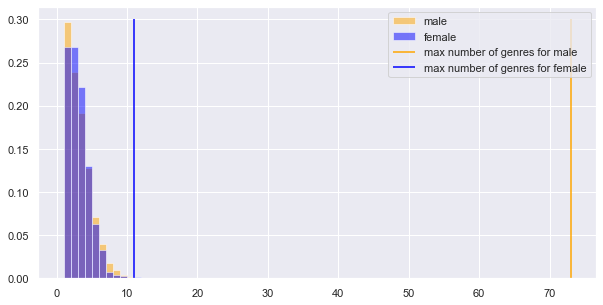

In [32]:
plt.figure(figsize = (10, 5))
plt.hist(data_male.genrelist_length, bins = range(1,max_num), density = True, color = 'orange', alpha = .5, label = 'male')
plt.vlines(x = max_num_male, ymin = 0 , ymax = .3, label = 'max number of genres for male', color = 'orange')
plt.vlines(x = max_num_female, ymin = 0 , ymax = .3, label = 'max number of genres for female', color = 'blue')
plt.hist(data_female.genrelist_length, bins = range(1,max_num), density = True, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

Here are the histograms as densities; three bins: $[1, mean)$, $[mean,2 \cdot mean)$, $[2 \cdot mean,max]$

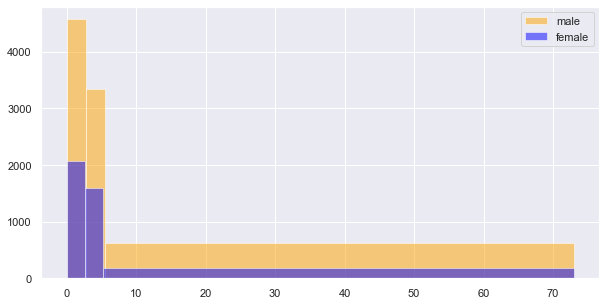

In [31]:
plt.figure(figsize = (10, 5))
plt.hist(data_male.genrelist_length, bins = [0,data_male.genrelist_length.mean(),2*data_male.genrelist_length.mean(),max_num], density = False, color = 'orange', alpha = .5, label = 'male')
plt.hist(data_female.genrelist_length, bins = [0,data_female.genrelist_length.mean(),2*data_female.genrelist_length.mean(),max_num], density = False, color = 'blue', alpha = .5, label = 'female')
plt.legend()
plt.show()

## What are the most common genre labels? 

(This deals only with the training data, not the test data.)

### Count the number of times that a label occurs:

In [33]:
genre_list_1 = data.genrelist.values.tolist()
genre_list_1 = [x for y in genre_list_1 for x in y]
genre_counts = pd.Series(genre_list_1)
label_value_counts = genre_counts.value_counts()

In [34]:
label_value_counts[:20]

pop                 2617
rock                1765
country             1613
r_and_b             1534
hip_hop             1114
folk                1046
soul                1023
jazz                 962
alternative_rock     937
blues                859
pop_rock             661
hard_rock            616
indie_rock           495
heavy_metal          453
folk_rock            403
punk_rock            369
gospel               346
blues_rock           335
dance                307
rock_and_roll        299
dtype: int64

In [35]:
print('In the training data there are {} unique genre labels.'.format(label_value_counts.shape[0]))

In the training data there are 1350 unique genre labels.


Export:

In [36]:
# label_value_counts.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_label_counts_TRAINING_{}.csv'.format(now))

In [37]:
lonely = label_value_counts[label_value_counts <2]
print('There are {} genre labels that only appear for a single artist'.format(lonely.sum()))

There are 581 genre labels that only appear for a single artist


In [38]:
# lonely.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_label_lonely_TRAINING_{}.csv'.format(now))

In [39]:
non_lonely = label_value_counts[label_value_counts >1]
print('There are {} genre labels that appear for at least two artists'.format(non_lonely.shape[0]))

There are 769 genre labels that appear for at least two artists


In [40]:
# non_lonely.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_label_non-lonely_TRAINING_{}.csv'.format(now))

### Which of the lonely labels appear as the only genre label?

First extract the artists with only one genre label:

In [41]:
genre_isolated_artists = data[data.genrelist_length == 1]

In [42]:
genre_isolated_artists.head()

,gender,genrelist,genrelist_length
artist,,,
Bobby_Edwards,male,[country],1
Allen_Collins,male,[southern_rock],1
Garland_Green,male,[soul],1
Claude_Gray,male,[country],1
Anna_Margaret_Collins,female,[pop],1


In [43]:
genre_isolated_artists.shape[0]

3561

This function marks whether the single genre label of the artist is one that only appears once (and thus for that artist).

In [44]:
def isolated(x):
    if x.genrelist[0] in lonely.index.values:
        x['lonely_isolated'] = 1  
    else: 
        x['lonely_isolated'] = 0
    return x

In [45]:
genre_isolated_artists = genre_isolated_artists.apply(isolated, axis = 1)

In [46]:
genre_isolated_artists.head()

,gender,genrelist,genrelist_length,lonely_isolated
artist,,,,
Bobby_Edwards,male,[country],1,0
Allen_Collins,male,[southern_rock],1,0
Garland_Green,male,[soul],1,0
Claude_Gray,male,[country],1,0
Anna_Margaret_Collins,female,[pop],1,0


Select the artists which are both genre_isolated and for which the genre is lonley (within this data set):

In [47]:
isolated_lonley_artists = genre_isolated_artists[genre_isolated_artists.lonely_isolated == 1]

In [48]:
isolated_lonley_artists.shape[0]

54

We conclude that of the 585 labels that only appear once, ~90% of these appear for artists which have multiple genre labels. 

## Promiscuity Plot: Graph of how genres are distributed among genre list sizes

Plan: plot (x = genre, y = n (length of genre list), z = # of artists with genre in their list of n labels ) as heat map

In [49]:
promiscuity = data.copy(deep = True)

In [50]:
promiscuity.head()

,gender,genrelist,genrelist_length
artist,,,
Pablo_Holman,male,"[pop, rock, emo_pop]",3
Bobby_Edwards,male,[country],1
La_Palabra,male,"[afro_cuban_jazz, son_montuno, guaracha, salsa...",4
Sherrick,male,"[r_and_b, soul]",2
Allen_Collins,male,[southern_rock],1


Create column for every genre label. (use full set or train set?)

In [51]:
for label in label_value_counts.index:
    promiscuity[label] = 0
    promiscuity[label].astype('int64')

In [52]:
promiscuity.head()

,gender,genrelist,genrelist_length,pop,rock,country,r_and_b,hip_hop,folk,soul,...,aggressive_soul,traditional_tunes,homo_hop,traditional_gospel,canadian,celtic_pop,cybergrind,viking_metal,progressive_jazz,cinematic
artist,,,,,,,,,,,,,,,,,,,,,
Pablo_Holman,male,"[pop, rock, emo_pop]",3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bobby_Edwards,male,[country],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
La_Palabra,male,"[afro_cuban_jazz, son_montuno, guaracha, salsa...",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sherrick,male,"[r_and_b, soul]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allen_Collins,male,[southern_rock],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Define Function for one-hot encoding:

In [53]:
"""One-hot encoding"""
def one_hot_label(x):
    for label in x.genrelist:
        x[label] = 1
    return x

In [54]:
for label in promiscuity.columns[2:]:
    promiscuity[label].astype('int64')

Apply:

In [55]:
promiscuity = promiscuity.apply(one_hot_label, axis = 1)

In [56]:
promiscuity.head()

,gender,genrelist,genrelist_length,pop,rock,country,r_and_b,hip_hop,folk,soul,...,aggressive_soul,traditional_tunes,homo_hop,traditional_gospel,canadian,celtic_pop,cybergrind,viking_metal,progressive_jazz,cinematic
artist,,,,,,,,,,,,,,,,,,,,,
Pablo_Holman,male,"[pop, rock, emo_pop]",3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bobby_Edwards,male,[country],1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
La_Palabra,male,"[afro_cuban_jazz, son_montuno, guaracha, salsa...",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sherrick,male,"[r_and_b, soul]",2,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Allen_Collins,male,[southern_rock],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
promiscuity['genrelist_length']

artist
Pablo_Holman     3
Bobby_Edwards    1
La_Palabra       4
Sherrick         2
Allen_Collins    1
                ..
Steve_Gaines     2
Dan_Hoerner      3
Detail           2
Billy_Woods      1
Dani_Filth       4
Name: genrelist_length, Length: 12376, dtype: int64

In [58]:
promiscuity_count = promiscuity.groupby(['genrelist_length'], as_index = False).sum() # as_index = False is needed to maintain dtype = int; deals with a pandas bug

In [59]:
promiscuity_count

,genrelist_length,pop,rock,country,r_and_b,hip_hop,folk,soul,jazz,alternative_rock,...,aggressive_soul,traditional_tunes,homo_hop,traditional_gospel,canadian,celtic_pop,cybergrind,viking_metal,progressive_jazz,cinematic
0,1,418,212,720,59,443,118,21,176,68,...,1,0,0,0,0,0,0,0,0,0
1,2,692,426,322,357,227,227,189,190,132,...,0,1,0,0,0,0,0,0,0,0
2,3,684,418,223,454,195,273,281,193,201,...,0,0,0,1,1,0,0,0,0,1
3,4,409,314,167,295,115,206,226,163,188,...,0,0,0,0,0,0,0,0,0,0
4,5,209,198,85,190,61,109,150,102,139,...,0,0,1,0,0,0,0,0,0,0
5,6,108,104,44,92,36,56,80,65,119,...,0,0,0,0,0,0,0,0,0,0
6,7,42,39,23,42,19,26,38,29,50,...,0,0,0,0,0,0,0,1,0,0
7,8,26,26,15,20,7,15,18,22,23,...,0,0,0,0,0,1,0,0,0,0
8,9,14,14,6,11,4,6,9,9,9,...,0,0,0,0,0,0,0,0,0,0
9,10,4,4,3,4,2,1,1,6,4,...,0,0,0,0,0,0,0,0,0,0


We record the dtypes: the need to do this may be becaues of a NaN present somewhere

In [60]:
dtypes_before = promiscuity_count.dtypes

Add subtotals for each genre:

In [61]:
promiscuity_count.at['subtotals'] = promiscuity_count.sum()

To maintain ints we reset the dtypes:

In [62]:
promiscuity_count = promiscuity_count.astype(dtypes_before)
promiscuity_count.set_index(['genrelist_length'], inplace = True)

NOTE: subtotals row is now labeled as 238 (dtype = int64).

Let's look at the most frequent genres:

In [63]:
promiscuity_count.iloc[:,:7]

,pop,rock,country,r_and_b,hip_hop,folk,soul
genrelist_length,,,,,,,
1,418,212,720,59,443,118,21
2,692,426,322,357,227,227,189
3,684,418,223,454,195,273,281
4,409,314,167,295,115,206,226
5,209,198,85,190,61,109,150
6,108,104,44,92,36,56,80
7,42,39,23,42,19,26,38
8,26,26,15,20,7,15,18
9,14,14,6,11,4,6,9


In [64]:
promiscuity_count_100 = promiscuity_count[promiscuity_count.columns[promiscuity_count.loc[238] >100]]

In [65]:
promiscuity_count_100

,pop,rock,country,r_and_b,hip_hop,folk,soul,jazz,alternative_rock,blues,...,world,electro_pop,experimental_rock,jazz_fusion,alternative,pop_punk,power_pop,art_rock,rhythm_and_blues,indie_folk
genrelist_length,,,,,,,,,,,,,,,,,,,,,
1,418,212,720,59,443,118,21,176,68,116,...,8,6,2,0,10,3,4,0,12,4
2,692,426,322,357,227,227,189,190,132,179,...,13,20,12,18,20,11,15,8,34,19
3,684,418,223,454,195,273,281,193,201,169,...,30,28,16,27,39,21,24,14,21,34
4,409,314,167,295,115,206,226,163,188,148,...,33,28,22,22,22,23,31,36,17,22
5,209,198,85,190,61,109,150,102,139,114,...,18,25,24,22,14,29,24,18,16,13
6,108,104,44,92,36,56,80,65,119,57,...,12,6,19,18,9,18,15,21,7,3
7,42,39,23,42,19,26,38,29,50,38,...,4,6,17,7,2,7,1,7,1,4
8,26,26,15,20,7,15,18,22,23,19,...,6,2,5,3,2,3,0,4,4,1
9,14,14,6,11,4,6,9,9,9,9,...,3,0,1,3,1,2,0,1,1,1


In [66]:
promiscuity_count.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/promiscuity_table.csv')

In [67]:
promiscuity_count = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/promiscuity_table.csv', index_col = 'genrelist_length')

Use log of promiscuity count:

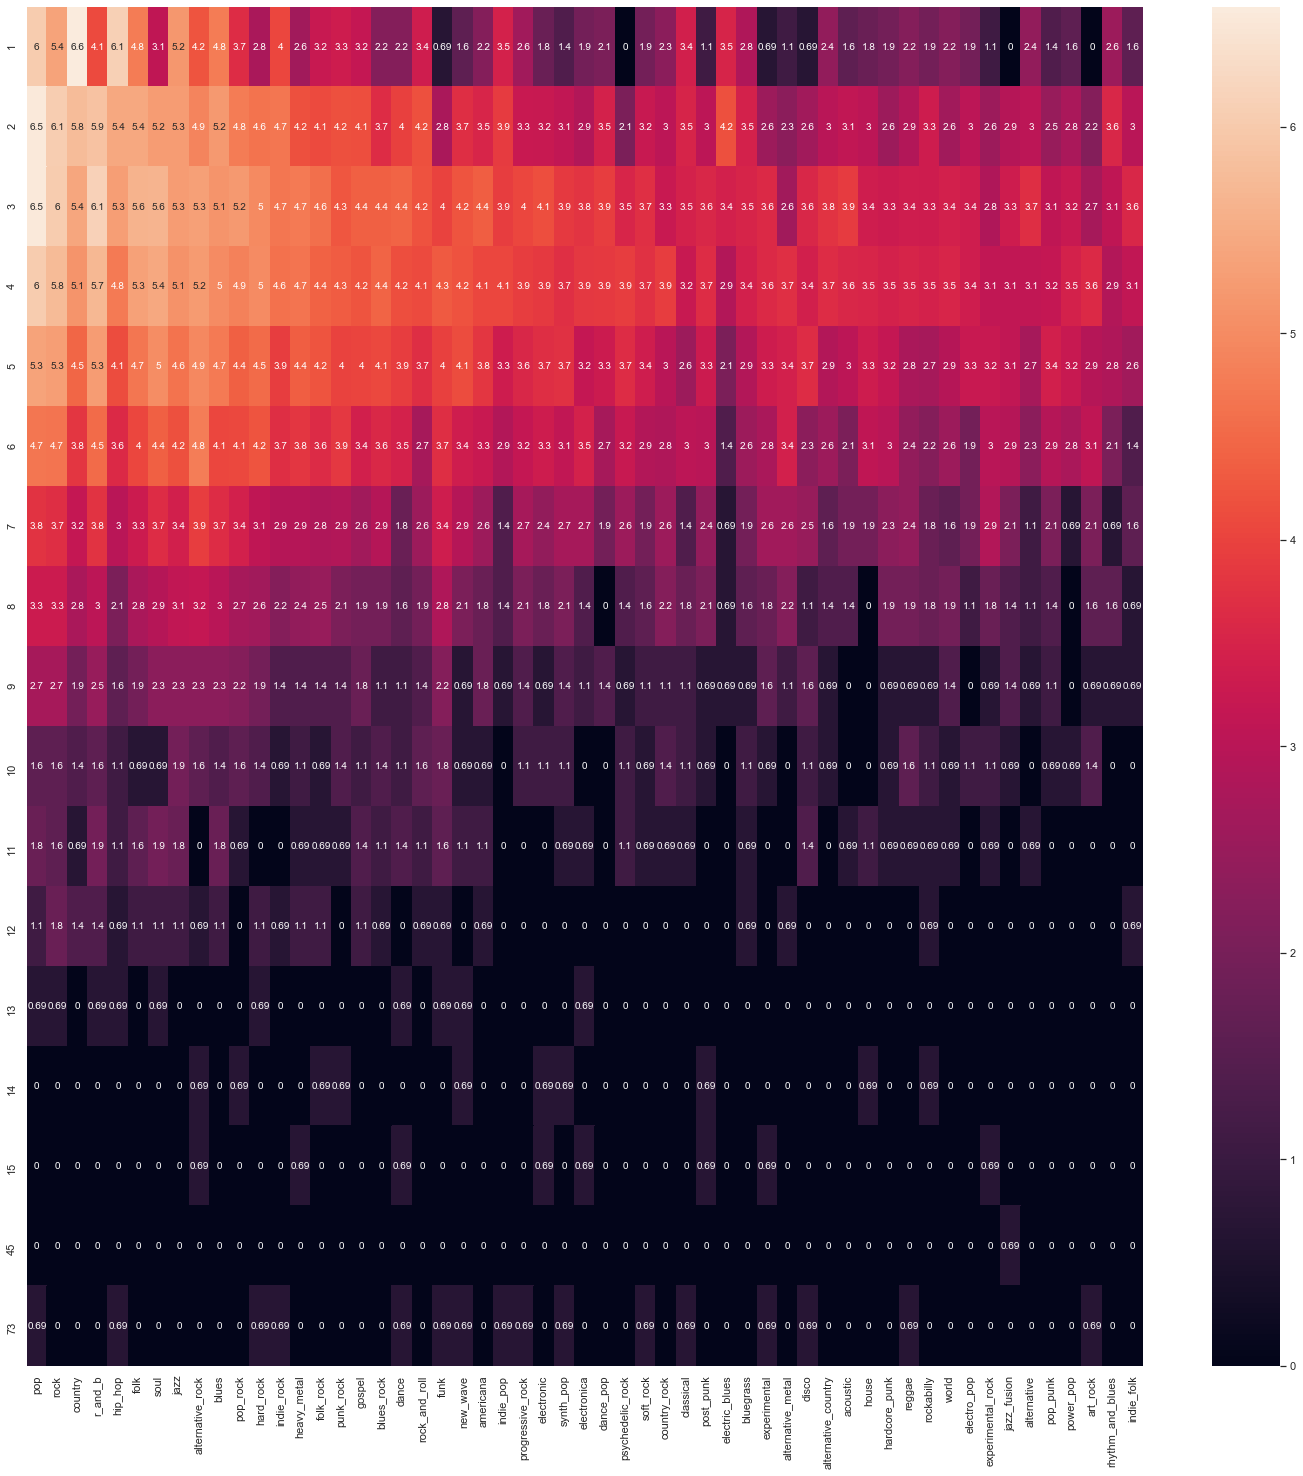

In [68]:
plt.figure(figsize = (25,25))
sns.heatmap(np.log(promiscuity_count_100.values[:-1,:]+1), xticklabels = promiscuity_count_100.columns, yticklabels = promiscuity_count_100.index[:-1]   , annot = True, cbar = True)

Now let's look at a relative metric:

In [69]:
promiscuity_count_relative = promiscuity_count_100.copy(deep = True)
for genre in promiscuity_count_relative.columns:
    promiscuity_count_relative[genre] = promiscuity_count_relative[genre]/promiscuity_count_100.loc[238,genre]

In [70]:
# promiscuity_count_relative

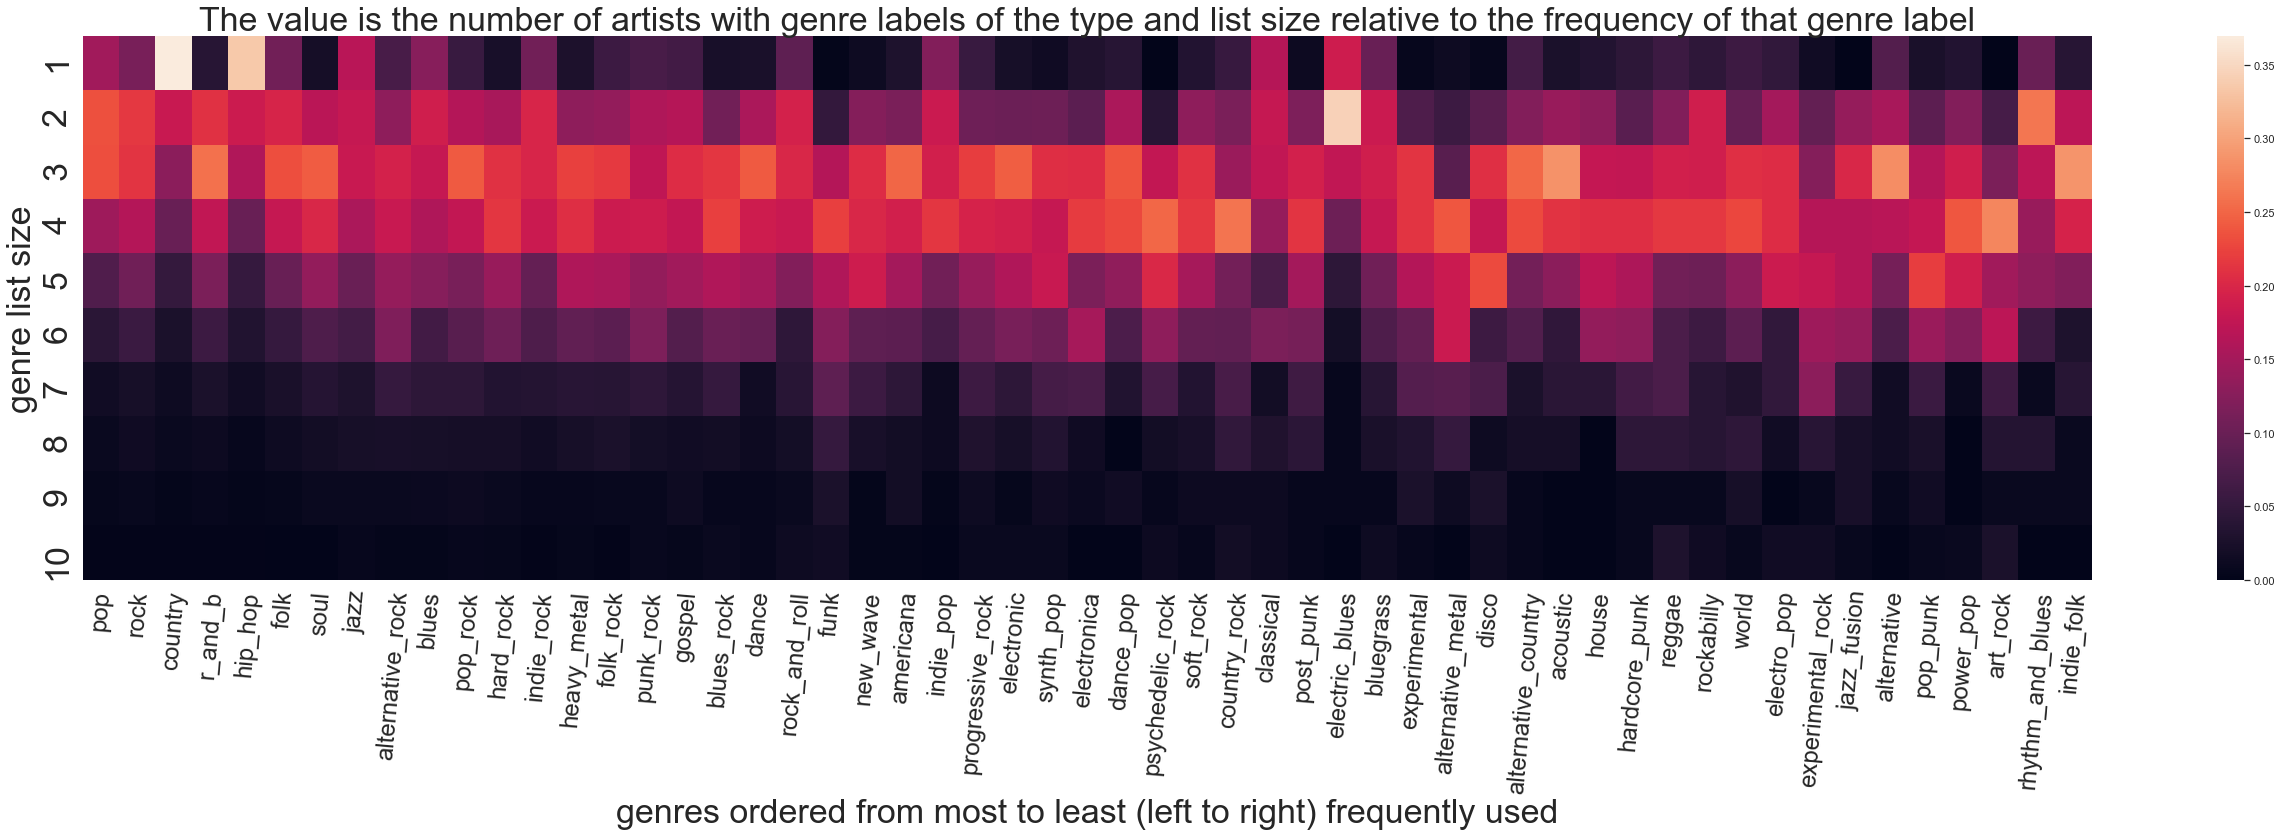

In [71]:
plt.figure(figsize = (45,10))
sns.heatmap(np.log(promiscuity_count_relative.values[:10,:]+1), xticklabels = promiscuity_count_relative.columns, yticklabels = promiscuity_count_relative.index[:10]   , annot = False, cbar = True)
plt.ylabel('genre list size', fontsize = 34)
plt.xlabel('genres ordered from most to least (left to right) frequently used', fontsize = 34)
plt.title('The value is the number of artists with genre labels of the type and list size relative to the frequency of that genre label', fontsize = 34)
plt.xticks(rotation = 85, fontsize = 24)
plt.yticks(fontsize = 34)
plt.savefig('/Users/Daniel/Code/Genre/visualizations/promiscuity_relative_plot.pdf', bbox_inches = 'tight')

# The following needs to be organized and directed:

it is similar to the promiscuity plot, but uses >= rather than = for counting promiscuity

### Let's take a look at which genre labels appear when there are at least G genre labels (G to be determined).

In [81]:
data.head()

,gender,genrelist,genrelist_length
artist,,,
Pablo_Holman,male,"[pop, rock, emo_pop]",3
Bobby_Edwards,male,[country],1
La_Palabra,male,"[afro_cuban_jazz, son_montuno, guaracha, salsa...",4
Sherrick,male,"[r_and_b, soul]",2
Allen_Collins,male,[southern_rock],1


In [82]:
G = 6

In [83]:
data_many = data[data.genrelist_length >= G]

In [84]:
data_many.shape

(816, 3)

### List of genre labels that appear for artists with at least G labels:

In [85]:
# preliminary list of lists
genre_list_G = data_many.genrelist.values.tolist()

In [86]:
genre_list_G[:2]

[['jazz', 'blues', 'swing', 'pop', 'rock', 'r_and_b'],
 ['r_and_b', 'hard_rock', 'blues_rock', 'blues', 'jazz', 'jazz_fusion']]

In [87]:
# flatten the list of lists to a list
genre_list_G = [x for y in genre_list_G for x in y]

Count the number of times that a label occurs, filter out labels that occur less than 100 times

In [88]:
ser = pd.Series(genre_list_G)
#ser.value_counts()[ser.value_counts() > 99]
df = pd.DataFrame(ser.value_counts(),  columns = ['frequency in lists with at least {} genres'.format(G)])
df.index.name = 'genre'

In [89]:
df

,frequency in lists with at least 6 genres
genre,
alternative_rock,209
pop,204
rock,197
r_and_b,192
soul,155
...,...
2_tone,1
rumba,1
rock_ballads,1


In [90]:
lvc = pd.DataFrame(label_value_counts, columns = ['frequency'])
lvc.index.name = 'genre'

In [91]:
lvc

,frequency
genre,
pop,2617
rock,1765
r_and_b,1647
country,1613
hip_hop,1114
...,...
goregrind,1
blues_jazz,1
traditional_acoustic_blues,1


In [92]:
df2 = df.join(lvc, how = 'left')

In [93]:
df2['relative frequency %'] = round(100*df2['frequency in lists with at least {} genres'.format(G)]/df2['frequency'],2)

In [94]:
df2 = df2.sort_values(['relative frequency %'], axis = 0, ascending = False)

In [95]:
#df2.iloc[-20:]

In [96]:
df2.to_html('/Users/Daniel/Code/Genre/visualizations/appearances_in_list_with_at_least_{}_genres.html'.format(G))

The unique values of these promiscuous genres:

In [97]:
genre_list_G_unique = list(set(genre_list_G))
print(f'There are {len(genre_list_G_unique)} unique genre labels used for artists with at least 6 labels')

There are 698 unique genre labels used for artists with at least 6 labels


Look at those labels which are used for artists with $N$ or more labels and not for artists with $<N$ labels.

We also want to look at these in terms of gender...